Tasks: 
- Describe the degree betweenness and closeness of the data 
- Identify key influencers 
    - focus on the in degree
    - out degree 
    - people who are not presented 

In [107]:
#import necessary packages 
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from pylab import rcParams

In [108]:
#import adjacency matrix 
df = pd.read_csv('mkt_alibaba/Alibaba-network.csv',index_col=0)


FileNotFoundError: [Errno 2] No such file or directory: 'Alibaba-network.csv'

In [4]:
#convert adjacency matrix to edgelist dataframe directional
def edgelist(df):
    a = df.values
    c = df.columns
    n = len(c)
    
    c_ar = np.array(c)
    out = np.empty((n, n, 2), dtype=c_ar.dtype)
    
    out[...,0] = c_ar[:,None]
    out[...,1] = c_ar
    
    mask = ~np.eye(n,dtype=bool)
    df_out = pd.DataFrame(out[mask], columns=[['Source','Target']])
    df_out['Weight'] = a[mask]
    return df_out

In [12]:
## create an edge list with all the connections 
edge_df = pd.DataFrame()
edge_df =edgelist(df)
edge_df.columns = edge_df.columns.get_level_values(0)
edge_df_connected = edge_df.query('Weight != 0.0')
edge_df_connected=edge_df_connected[['Source','Target']]
edge_tuple = edge_df_connected.to_records(index=False,column_dtypes = {"Source":"int32", "Target":"int32"})
edges = list(edge_tuple)
#create node list 
nodes = list(df.index)

In [6]:
##create an empty graph 
G = nx.DiGraph()
##load the edges and nodes 
G.add_edges_from(edges)
G.add_nodes_from(nodes)

In [24]:
## People who are isolated from the network, no connection to anyone else
edge_df_zero=edge_df.query('Weight == 0.0')
edge_df_zero.groupby(['Source']).count().query('Weight==526')

,Target,Weight
Source,,
179,526,526
211,526,526
298,526,526
333,526,526
347,526,526
446,526,526
482,526,526
484,526,526
491,526,526


In [23]:
##remove low 
##remove = [node for node,degree in dict(G.degree()).items() if degree < 4]
##G.remove_nodes_from(remove)

In [7]:
##remove = [node for node,degree in dict(G.degree()).items() if degree < 2]
##G.remove_nodes_from(remove)

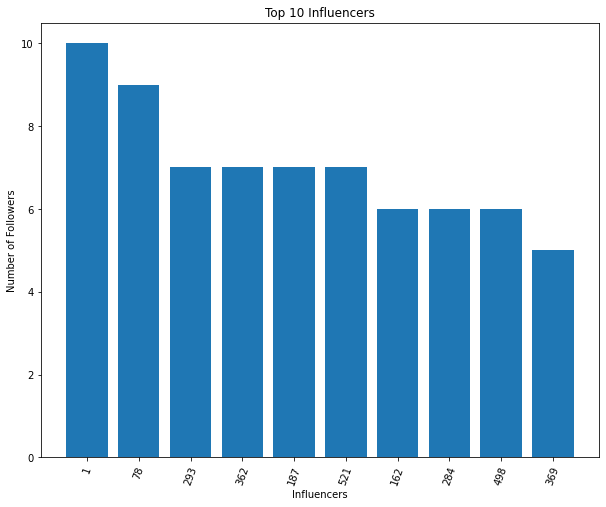

<Figure size 720x576 with 0 Axes>

In [84]:
##Top ten influencers based on the number of followers. 
top10_influenceres=sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:10]
rcParams['figure.figsize'] = 10, 8
plt.bar(range(len(top10_influenceres)), [val[1] for val in top10_influenceres], align='center')
plt.xticks(range(len(top10_influenceres)), [val[0] for val in top10_influenceres])
plt.xticks(rotation=70)
plt.title('Top 10 Influencers')
plt.xlabel('Influencers')
plt.ylabel('Number of Followers')
plt.show()
plt.savefig('Top10Influencers')

In [97]:
betSet

{1, 4, 29, 78, 162, 198, 293, 303, 311, 461}

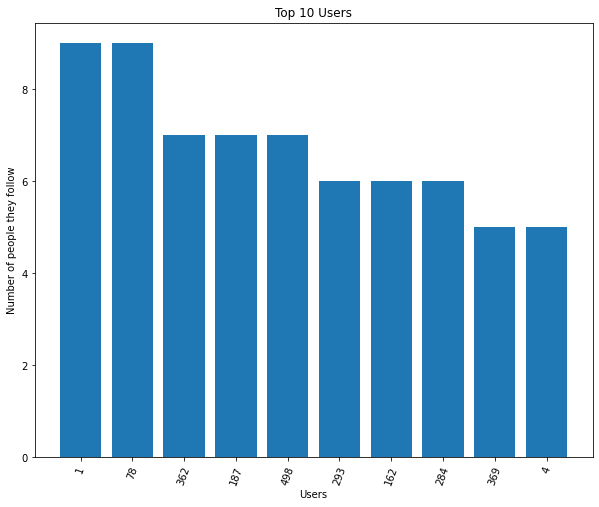

<Figure size 720x576 with 0 Axes>

In [85]:
##Top ten active users based on the number of people they follow
sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:10]
rcParams['figure.figsize'] = 10, 8
top10_users=sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:10]
plt.bar(range(len(top10_users)), [val[1] for val in top10_users], align='center')
plt.xticks(range(len(top10_users)), [val[0] for val in top10_users])
plt.xticks(rotation=70)
plt.title('Top 10 Users')
plt.xlabel('Users')
plt.ylabel('Number of people they follow')
plt.show()
plt.savefig('Top10Users')

In [103]:
##sort by betweenness centrality 
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
betSet=set(sorted(betCent, key=betCent.get, reverse=True)[:10])
sorted(betCent.items(), key = lambda x: x[1], reverse= True)[:10]

[(162, 0.018783835133464644),
 (4, 0.017096136872509344),
 (311, 0.01569252747094177),
 (78, 0.014323189106379705),
 (293, 0.01368286183601369),
 (461, 0.013546078311123297),
 (303, 0.011370468707536982),
 (29, 0.01104549510224794),
 (198, 0.010699778500876618),
 (1, 0.009753416882514082)]

In [102]:
##sort by closeness centrality 
cloCent = nx.closeness_centrality(G)
cloSet=set(sorted(cloCent, key=cloCent.get, reverse=True)[-10:])
sorted(cloCent.items(), key = lambda x: x[1], reverse= True)[-10:]

[(527, 0.0),
 (95, 0.0),
 (179, 0.0),
 (211, 0.0),
 (333, 0.0),
 (347, 0.0),
 (446, 0.0),
 (482, 0.0),
 (484, 0.0),
 (491, 0.0)]

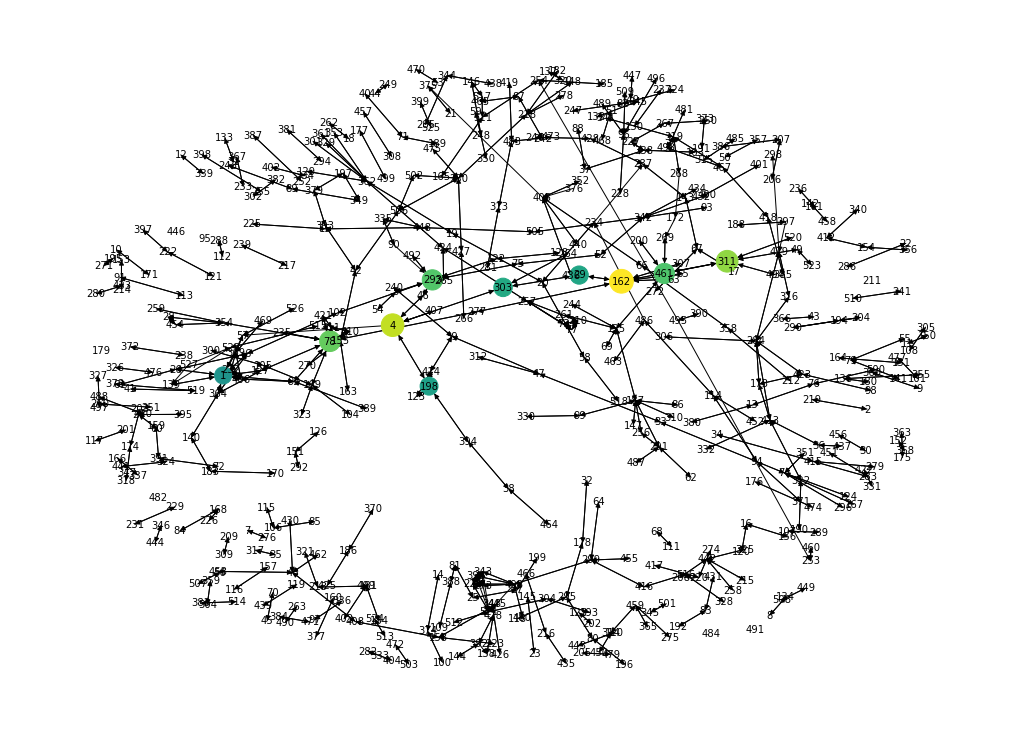

In [104]:
# visualize the network -  betweenness 
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))

high_light_nodes = betSet
node_color = [betCent[v ]* 20000 if v in high_light_nodes else 0 for v in G ]
node_size = [betCent[v ]* 30000 if v in high_light_nodes else 0 for v in G ] 
#node_size = [v * 10000 if k in high_light_nodes else 10 for k,v in zip(G,betCent.values())]

nx.draw(G, pos, node_color=node_color, 
        with_labels=True, 
        node_size=node_size,
        font_size=10,
        linewidths=1)


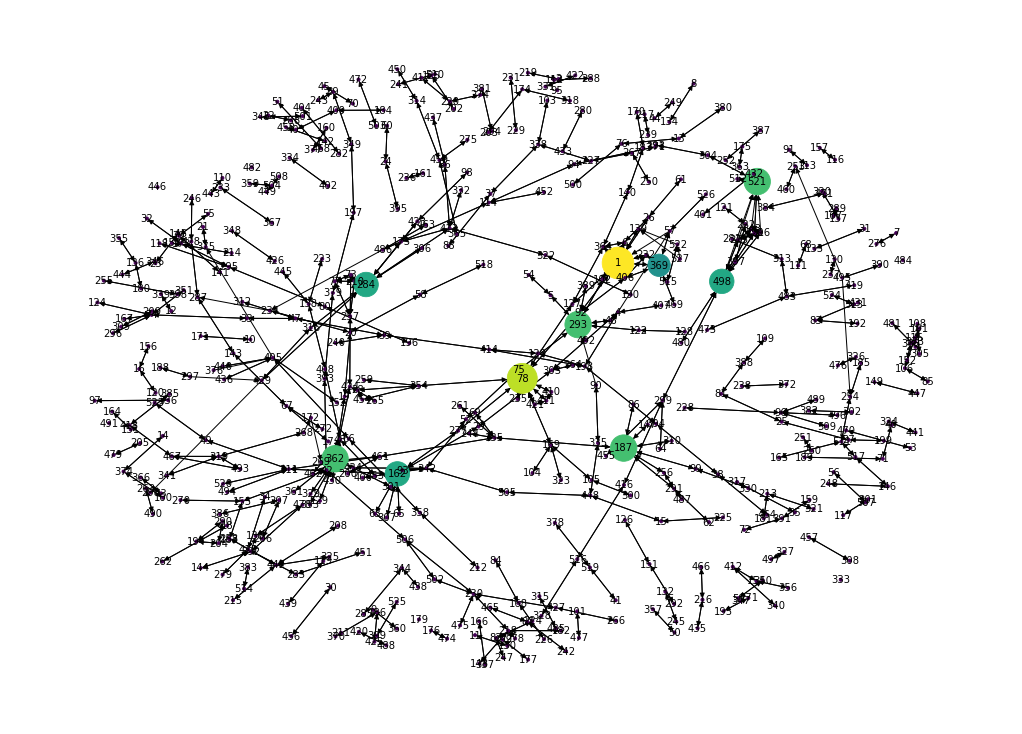

In [101]:
# visualize the network - in degree - most interested factor
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))

high_light_nodes = [val[0] for val in top10_influenceres]
node_color = [20000.0 * G.in_degree(v) if v in high_light_nodes else 0 for v in G]
node_size = [100.0 * G.in_degree(v) if v in high_light_nodes else 10 for v in G] 
#node_size = [v * 10000 if k in high_light_nodes else 10 for k,v in zip(G,betCent.values())]

nx.draw(G, pos, node_color=node_color, 
        with_labels=True, 
        node_size=node_size,
        font_size=10,
        linewidths=0.8)

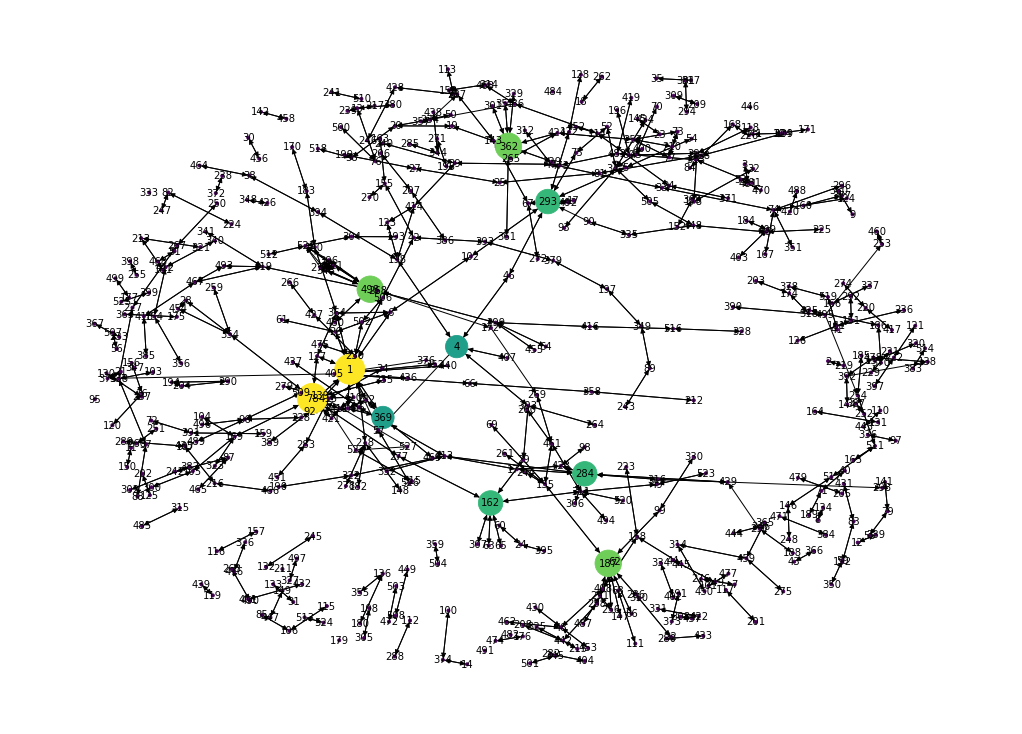

In [105]:
# visualize the network - in degree - most interested factor
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))

high_light_nodes = [val[0] for val in top10_users]
node_color = [20000.0 * G.out_degree(v) if v in high_light_nodes else 0 for v in G]
node_size = [100.0 * G.out_degree(v) if v in high_light_nodes else 10 for v in G] 
#node_size = [v * 10000 if k in high_light_nodes else 10 for k,v in zip(G,betCent.values())]

nx.draw(G, pos, node_color=node_color, 
        with_labels=True, 
        node_size=node_size,
        font_size=10,
        linewidths=0.8)

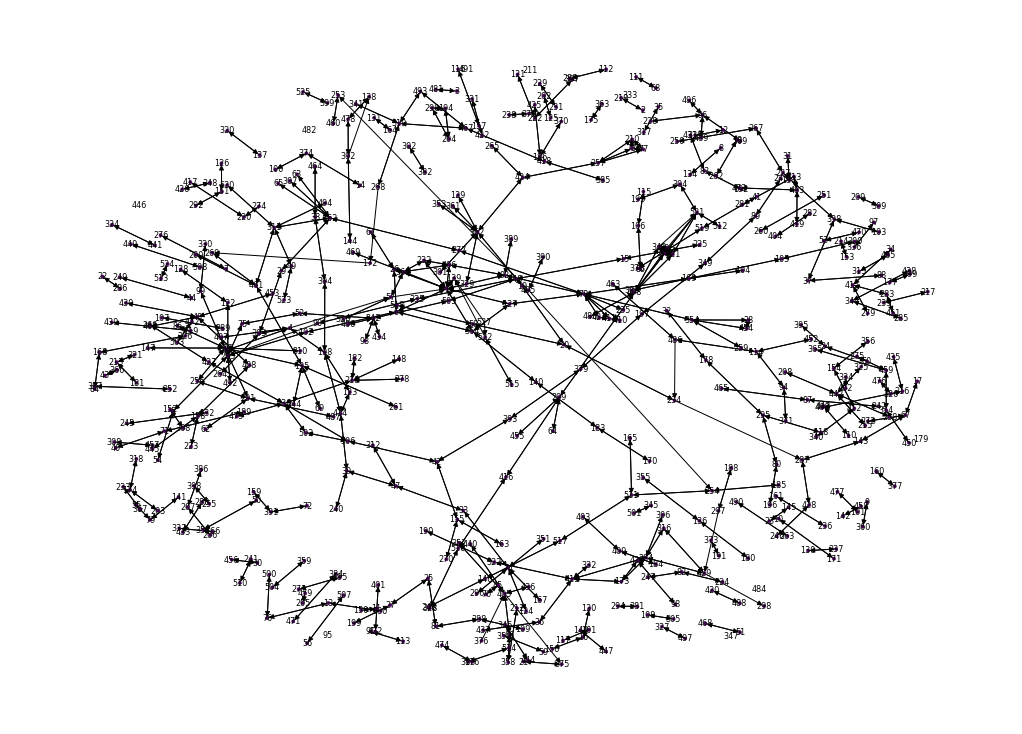

In [106]:
# visualize the network - closeness 
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))

high_light_nodes = cloSet
node_color = [20000.0 * cloCent[v] if v in high_light_nodes else 0 for v in G]
node_size = [10000.0 * cloCent[v] if v in high_light_nodes else 10 for v in G] 

nx.draw(G, pos, node_color=node_color, 
        with_labels=True, 
        node_size=node_size,
        font_size=8,
        linewidths=0.5)

